## Capston Project Heart Disease Predition - Group 2

#### Problem Statement
1. World Health Organization has estimated 12 million deaths occur worldwide; every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardiovascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high-risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk 

2. We have to predict whether the patient has 10-year risk of future coronary heart disease (CHD)


#### Details

Data:
4238 rows, 16 columns

Data Structure:
    
Demographic
Sex: male or female(Nominal)
Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
Current Smoker: whether or not the patient is a current smoker (Nominal)
Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
BP Meds: whether or not the patient was on blood pressure medication (Nominal)
Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)
Tot Chol: total cholesterol level (Continuous)
Sys BP: systolic blood pressure (Continuous)
Dia BP: diastolic blood pressure (Continuous)
BMI: Body Mass Index (Continuous)
Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
Glucose: glucose level (Continuous)

Predict variable (desired target)
10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Importing necessary librarires

In [550]:
#Basic libraries for dataframes and numeric computations
import numpy as np
import pandas as pd

#Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
#!pip install impyute
from impyute.imputation.cs import mice
#!pip install dython --> #corelation for categorical attributes
from dython.nominal import associations

#Scale data
from sklearn.preprocessing import MinMaxScaler
#For ourlier detection
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

#PCA
from sklearn.decomposition import PCA

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
import warnings
warnings.filterwarnings('ignore')
#!pip install plotnine
#from plotnine.data import mpg
#from plotnine import ggplot, aes, facet_grid, labs, geom_point

#Class imbalance
##!pip install imblearn
#Using SMOTE for class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter

#Modelling
#Import Library of Logistic Regression
from sklearn.linear_model import LogisticRegression


### Loading the heart diseaase data

In [551]:
df = pd.read_csv('Heart Disease.csv')

# DATA OVERVIEW

In [552]:
#Sample the data
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [553]:
#Get shape of the data
df.shape

#Rows = 4238
#Columns = 16

(4238, 16)

In [554]:
#Describe the data and observe distribution of data
df.describe(include = "all")

#1.Observe null counts in each field
#2.Observe Outliers 
#3.Observe min and max values
#4.Observe mean and std

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [555]:
df.info

<bound method DataFrame.info of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0        

In [556]:
#Duplicates check:
len(df[df.duplicated()])

# We observe that the dataset doesn't have any duplicate rows

0

In [557]:
#Listing unique value counts in each feature
def getUniqueValues(data):
    colNames = data.columns
    listUnique = []
    for col in colNames:
        listUnique.append([col, data[col].nunique()])

    d1 = pd.DataFrame(listUnique)
    d1.columns = ['Feature Name', 'Unique Value']
    d1 = d1.sort_values(by='Unique Value', ascending=False)
    return d1

getUniqueValues(df)

#We observe that the following features should be treated as categorical in the future:
#'education','male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD'

,Feature Name,Unique Value
12,BMI,1363
9,totChol,248
10,sysBP,234
11,diaBP,146
14,glucose,143
13,heartRate,73
1,age,39
4,cigsPerDay,33
2,education,4
0,male,2


In [558]:
#We would like to manually identify education as a categorical field and assign appropriate categories
df.education.value_counts(dropna=False)

1.0    1720
2.0    1253
3.0     687
4.0     473
NaN     105
Name: education, dtype: int64

In [559]:
#Replacing Education with known categories
df["education"].replace(1, "Some High School", inplace = True)
df["education"].replace(2, "High School", inplace = True)
df["education"].replace(3, "Some College", inplace = True)
df["education"].replace(4, "College", inplace = True)

In [560]:
#checking for class imbalance problem:
df.TenYearCHD.value_counts(normalize=True)

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

###### Our data has a class imbalance problem. Need to address this later

In [561]:
#Checking data types of the data
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['male', 'age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp',
        'diabetes', 'TenYearCHD'],
       dtype='object'),
 dtype('float64'): Index(['cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
        'glucose'],
       dtype='object'),
 dtype('O'): Index(['education'], dtype='object')}

# DATA PREPARATION AND FEATURE ENGINEERING

#### Technical Steps

1. Drop columns which are not required
2. Find missing value
3. Visualize missing value
4. Impute missing value 
5. Find Outlier
6. Single variate
7. Multi variate
8. Perform feature engineering
9. Split dataset between training and test in the ration of 70:30

#### 1.Drop columns which are not required

In [562]:
#View all columns
df.columns
#We observe that by viewing the data and attributes, there are no attributes that need to be manually removed
#All attributes will need to go through pre-processing

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [563]:
#identifyin rows to drop
df.education.value_counts(dropna=False)

Some High School    1720
High School         1253
Some College         687
College              473
NaN                  105
Name: education, dtype: int64

In [564]:
#We will need to drop the rows with unknown education as we cannot guess this and it's a small percentage
df = df[df['education'].notna()]
df.education.value_counts(dropna=False)

Some High School    1720
High School         1253
Some College         687
College              473
Name: education, dtype: int64

In [565]:
df.reset_index(drop=True, inplace=True)
df.shape

(4133, 16)

In [566]:
#checking for any single value columns
def removeSingleValueColumns(data):
    d1 = data.copy()
    for col in d1.columns:
        if d1[col].nunique() == 1:
            d1 = d1.drop([col], axis=1)
    return d1

df=removeSingleValueColumns(df)

#No single value colums are present hence no attributes were dropped

#### 2. Find missing value

In [567]:
#Check for missing value raw counts
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          27
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             49
sysBP                0
diaBP                0
BMI                 18
heartRate            1
glucose            380
TenYearCHD           0
dtype: int64

In [569]:
#Check for missing values in percentage

def getMissingCount(df):
        mis_val_table_ren_columns = pd.DataFrame({
            'dtype': df.dtypes,
            'num_missing': df.isnull().sum(),
            '% missing': round(100 * df.isnull().sum() / len(df), 2)
            }).sort_values('num_missing', ascending=False)
        #missingCount = data.isnull().sum() * 100/ len(data)
                
        return mis_val_table_ren_columns

data_missing = getMissingCount(df)
print(data_missing)

getMissingCount(df)
#We observe that Glucose has the highest % of nulls = 9%, followed by education at 2.4%

                   dtype  num_missing  % missing
glucose          float64          380       9.19
BPMeds           float64           53       1.28
totChol          float64           49       1.19
cigsPerDay       float64           27       0.65
BMI              float64           18       0.44
heartRate        float64            1       0.02
male               int64            0       0.00
age                int64            0       0.00
education         object            0       0.00
currentSmoker      int64            0       0.00
prevalentStroke    int64            0       0.00
prevalentHyp       int64            0       0.00
diabetes           int64            0       0.00
sysBP            float64            0       0.00
diaBP            float64            0       0.00
TenYearCHD         int64            0       0.00


,dtype,num_missing,% missing
glucose,float64,380,9.19
BPMeds,float64,53,1.28
totChol,float64,49,1.19
cigsPerDay,float64,27,0.65
BMI,float64,18,0.44
heartRate,float64,1,0.02
male,int64,0,0.00
age,int64,0,0.00
education,object,0,0.00
currentSmoker,int64,0,0.00


###### Since missing values are lower than 10%, we don't need to discard any attribute. We can impute accordingly.

#### 3. Visualize missing value

male               0.000000
age                0.000000
education          0.000000
currentSmoker      0.000000
cigsPerDay         0.653278
BPMeds             1.282361
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.185579
sysBP              0.000000
diaBP              0.000000
BMI                0.435519
heartRate          0.024195
glucose            9.194290
TenYearCHD         0.000000
dtype: float64


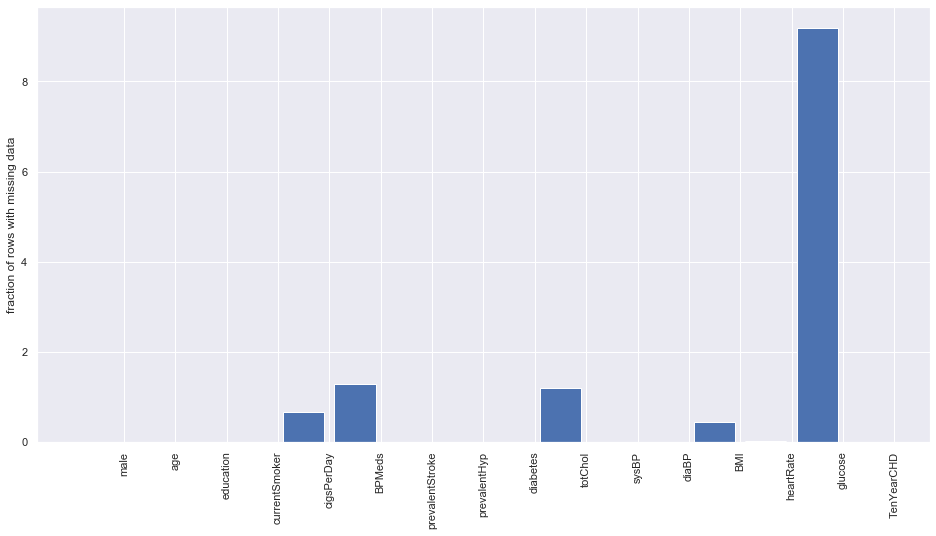

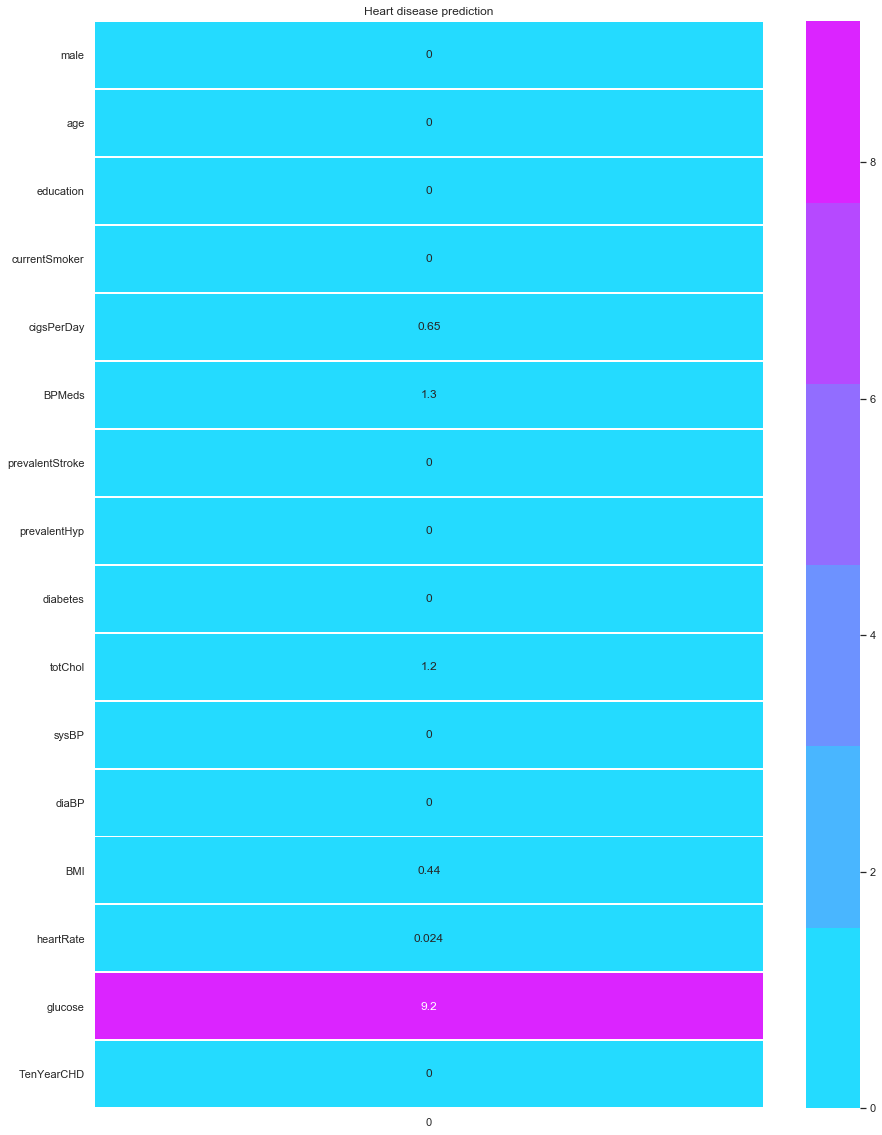

In [520]:
#Visualizing the missing values

def visualizeMissingValue(data):
    missingCount = getMissingCount(data)
    #missingCount = data.isnull().sum()/ len(data)
    print(missingCount)
    plt.figure(figsize=(16, 8))
    plt.xticks(np.arange(len(missingCount)) + 0.5, missingCount.index, rotation='vertical')
    plt.ylabel('fraction of rows with missing data')
    plt.bar(np.arange(len(missingCount)), missingCount)
    plt.show()

    plt.figure(figsize=(15, 20))
    sns.heatmap(pd.DataFrame(data.isnull().sum() / data.shape[0] * 100), annot=True,
    cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
    plt.title("Heart disease prediction")
    plt.show()
    
visualizeMissingValue(df)

In [521]:
#Identifying columns with high percentage of nulls to drop

def identifyColsToDrop(data, threshold=30.0):
    missingCols = getMissingCount(data)
    colsToDrop = missingCols[missingCols > threshold].index.values
    #colsToDrop = [col for (col, perc) in missingCols[missingCols > threshold].items()]
    return colsToDrop

def dropColumn(data, threshold):
    colsToDrop = self.identifyColsToDrop(data, threshold)
    data1 = data.drop(colsToDrop,axis=1)
    return data1

identifyColsToDrop(df)

# We see that there aren't any nulls > 30% in any attribute

array([], dtype=object)

In [522]:
#Alternate method to check for nulls > threshold
hf = df.isna().sum()
rows = df.count()[0]
Null_cols = hf[((hf*100/rows)>30.00)==True]*100/rows
Null_cols.count()

0

#### 4. Impute missing value

In [523]:
#Segregate data into numerical and categorical

#def getData(self):
#    return self.data

def getCategoricalData(data):
    categoricalCols = getCategoricalCols(data)
    return data[categoricalCols]

def getNumericData(data):
    numericCols =geNumericCols(data)
    return data[numericCols]

def getCategoricalCols( data):
    return data.select_dtypes(include=["category"]).columns

def getObjectCols(data):
    return data.select_dtypes(include=["object"]).columns

def geNumericCols(data):
    return data.select_dtypes(include=["number"]).columns

numericCols =geNumericCols(df) # This will be used Mice and for binning later
categoricalCols =getCategoricalCols(df)

In [524]:
numericCols

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [525]:
categoricalCols

Index([], dtype='object')

In [526]:
#We observe that the function categorizes all features as numeric columns but from earlier unique value observation, 
# we see that we need to manually assigned some of these features as categorical
numericCols=['totChol','glucose','sysBP','diaBP','heartRate','age','cigsPerDay','BMI']
categoricalCols=['education','male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
df_numeric=df[numericCols]
df_categorical=df[categoricalCols]

In [527]:
#Using mice to impute null values for the numerical columns
def imputeByMice(data, numericCols):

#dataNumeric = data.drop(nonNumeric, axis=1)
# numericCols = data.select_dtypes(include=["number"]).columns
    dataNumeric = data[numericCols]
    nonNumericCols = [col for col in data.columns if col not in numericCols]
    d2 = data[nonNumericCols]
# start the MICE training
    imputedDataMice = mice(dataNumeric.values)
    d1 = pd.DataFrame(imputedDataMice)
    d1.columns = dataNumeric.columns
    imputedData = pd.concat([d1, d2], axis=1)
## imputedData.columns = data.columns
    return imputedData
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))
df=imputeByMice(df, numericCols)
df

,totChol,glucose,sysBP,diaBP,heartRate,age,cigsPerDay,BMI,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,195.0,77.000000,106.0,70.0,80.0,39.0,0.0,26.97,1,College,0,0.0,0,0,0,0
1,250.0,76.000000,121.0,81.0,95.0,46.0,0.0,28.73,0,High School,0,0.0,0,0,0,0
2,245.0,70.000000,127.5,80.0,75.0,48.0,20.0,25.34,1,Some High School,1,0.0,0,0,0,0
3,225.0,103.000000,150.0,95.0,65.0,61.0,30.0,28.58,0,Some College,1,0.0,0,1,0,1
4,285.0,85.000000,130.0,84.0,85.0,46.0,23.0,23.10,0,Some College,1,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,313.0,86.000000,179.0,92.0,66.0,50.0,1.0,25.97,1,Some High School,1,0.0,0,1,0,1
4129,207.0,68.000000,126.5,80.0,65.0,51.0,43.0,19.71,1,Some College,1,0.0,0,0,0,0
4130,248.0,86.000000,131.0,72.0,84.0,48.0,20.0,22.00,0,High School,1,NaN,0,0,0,0
4131,210.0,77.608826,126.5,87.0,86.0,44.0,15.0,19.16,0,Some High School,1,0.0,0,0,0,0


In [528]:
df.isnull().sum()
# We observe that all data has the null values imputed

totChol             0
glucose             0
sysBP               0
diaBP               0
heartRate           0
age                 0
cigsPerDay          0
BMI                 0
male                0
education           0
currentSmoker       0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
TenYearCHD          0
dtype: int64

In [529]:
#BPMeds is a categorical field that we can mode impute based on frequency
df.BPMeds.value_counts(normalize=True,dropna=False)

#We observe that 97% of the patients are not taking BP meds 
#Yet to assess this for mode imputation 


0.0    0.957900
1.0    0.029277
NaN    0.012824
Name: BPMeds, dtype: float64

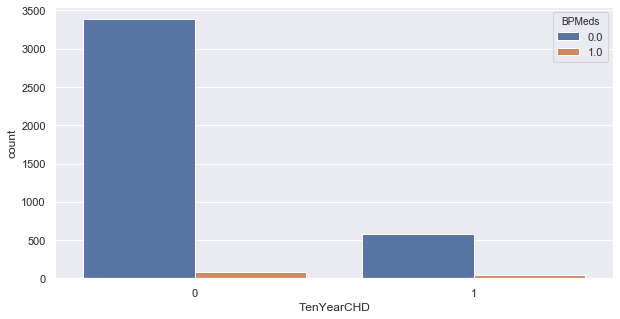

In [530]:
#Viewing the same graphically to determine if mode imputation is required
ax = sns.countplot(x="TenYearCHD", hue="BPMeds", data=df)

In [531]:
#performing mode imputation for BPMeds
df["BPMeds"].replace(np.nan, 0, inplace = True)

In [532]:
df.isnull().sum()

totChol            0
glucose            0
sysBP              0
diaBP              0
heartRate          0
age                0
cigsPerDay         0
BMI                0
male               0
education          0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
TenYearCHD         0
dtype: int64

#### No more nulls present. Missing value imputation completed

#### 5. Find Outlier

In [533]:
#checking for outliers manually
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,totChol,glucose,sysBP,diaBP,heartRate,age,cigsPerDay,BMI,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,236.701273,81.940921,132.367046,82.872248,75.923067,49.557222,9.032357,25.778382,0.427293,0.494798,0.029277,0.006049,0.311154,0.025647,0.151948
std,43.936786,22.905452,22.080332,11.952654,12.048181,8.561628,11.886672,4.076458,0.494745,0.500033,0.168601,0.077548,0.463022,0.158100,0.359014
min,107.000000,40.000000,83.500000,48.000000,44.000000,32.000000,0.000000,15.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,206.000000,72.000000,117.000000,75.000000,68.000000,42.000000,0.000000,23.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,234.000000,78.471860,128.000000,82.000000,75.000000,49.000000,0.000000,25.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,262.658361,86.000000,144.000000,89.500000,83.000000,56.000000,20.000000,27.990000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
90%,292.000000,97.000000,162.000000,98.000000,92.000000,62.000000,25.000000,30.726000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
95%,312.000000,107.000000,175.200000,105.000000,98.000000,64.000000,30.000000,32.770000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
99%,353.680000,170.000000,200.000000,118.000000,110.000000,67.000000,43.000000,39.014400,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000


In [536]:
#In order to further use the data in outlier detection convert object fields to numerical
def labelEncoder(data, columns):
    d1 = data.copy()
    for i in columns:
        le = LabelEncoder()
        d1[i] = le.fit_transform(d1[i])
    return d1
#except Exception as exp:
#self.errObj = ErrorHandler()
#err = self.errObj.handleErr(str(exp))
df_encoded=labelEncoder(df,columns=['education'])

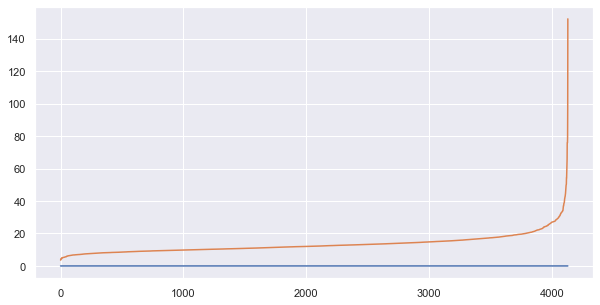

In [537]:
#Outlier detection using DBSCAN

def findDBScanEPS(data, n_neighbors):
    nn = NearestNeighbors(n_neighbors=2)
    nbrs = nn.fit(data)
    distances, indices = nbrs.kneighbors(data)

    distances = np.sort(distances, axis=0)
    #distances = distances[:, 1]
    plt.plot(distances)
findDBScanEPS(df_encoded, 2)

Estimated number of clusters: 25
Estimated number of noise points: 148


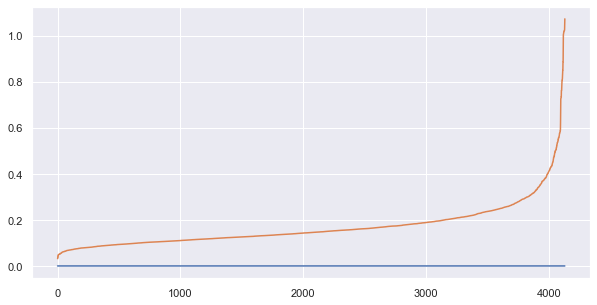

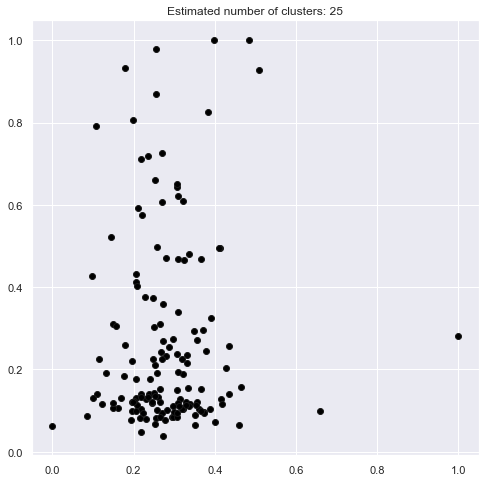

[35,
 42,
 93,
 135,
 158,
 242,
 244,
 250,
 255,
 279,
 288,
 303,
 348,
 431,
 459,
 462,
 468,
 630,
 644,
 719,
 744,
 766,
 812,
 843,
 929,
 952,
 997,
 1004,
 1017,
 1041,
 1081,
 1133,
 1204,
 1264,
 1300,
 1323,
 1441,
 1477,
 1509,
 1545,
 1578,
 1602,
 1626,
 1757,
 1803,
 1805,
 1844,
 1880,
 1922,
 1940,
 1943,
 1952,
 1981,
 1986,
 2035,
 2042,
 2117,
 2123,
 2130,
 2147,
 2160,
 2177,
 2239,
 2317,
 2345,
 2399,
 2408,
 2429,
 2435,
 2440,
 2464,
 2495,
 2534,
 2551,
 2579,
 2591,
 2602,
 2615,
 2666,
 2687,
 2688,
 2727,
 2732,
 2733,
 2779,
 2821,
 2836,
 2852,
 2855,
 2886,
 2908,
 2910,
 2927,
 2933,
 3010,
 3034,
 3057,
 3061,
 3122,
 3159,
 3173,
 3228,
 3234,
 3235,
 3241,
 3316,
 3363,
 3372,
 3401,
 3405,
 3417,
 3451,
 3463,
 3465,
 3513,
 3578,
 3581,
 3586,
 3588,
 3627,
 3647,
 3655,
 3697,
 3701,
 3713,
 3721,
 3743,
 3748,
 3750,
 3753,
 3766,
 3777,
 3829,
 3830,
 3853,
 3872,
 3929,
 3935,
 3942,
 3957,
 3964,
 3976,
 3995,
 4049,
 4089,
 4098,
 4118,
 

In [538]:
def DBScanOutlier(data): # DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
#try:
# dataNumeric = data.drop(nonNumeric, axis=1)
    d1 = data.copy()
#d1 = pd.get_dummies(d1[numericCols])

    scaler = MinMaxScaler()
    d2 = scaler.fit_transform(d1)
    d2 = pd.DataFrame(d2, columns=d1.columns)

    findDBScanEPS(d2, 5)
# epsfloat, default=0.5
# The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN
# parameter to choose appropriately for your data set and distance function.
# min_samplesint, default=5
# The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
# This includes the point itself.

    db = DBSCAN(eps=0.5, min_samples=5).fit(d2)

    from sklearn import metrics
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
# detectedCluster = DBSCAN(eps=3.0, metric='euclidean', min_samples=10, n_jobs=-1)
# clusters = detectedCluster.fit_predict(d2)
# Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(len(d2), labels))
#print("Completeness: %0.3f" % metrics.completeness_score(len(d2), labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(len(d2), labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(len(d2), labels))
#print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(len(d2), labels))
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(d2, labels))

# Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
    for each in np.linspace(0, 1, len(unique_labels))]
    plt.figure(figsize=(8, 8))
    for k, col in zip(unique_labels, colors):
        if k == -1:
# Black used for noise.
            col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = d2[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = d2[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

#cmap = cm.get_cmap('Set1')
#d2.plot.scatter(x='avgDeathsPerYear', y='avgAnnCount', c=clusters, cmap=cmap, colorbar=False)
#plt.close()
    outlierRow = []
    for i in range(len(labels)):
        if (labels[i] == -1):
#print(list((i, labels[i])))
            outlierRow.append(i)

    return outlierRow

#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))


DBScanOutlier(df_encoded)


#### During modeling we will run the model with and without outliers

In [540]:
#Scaling the data for outlier visualization
def minMaxScaler(data):
    scaler = MinMaxScaler()
    scaledData = scaler.fit_transform(data)
    scaledData = pd.DataFrame(scaledData, columns=data.columns)
    return scaledData

scaledData=minMaxScaler(df_encoded)


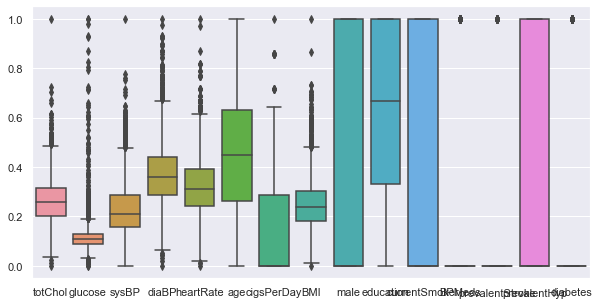

In [541]:
#Visualizing the outliers
def visualizeOutlier(scaledData):
# dataNumeric = data.drop(nonNumeric, axis=1)
    sns.boxplot(data=scaledData.iloc[:,0:15])

visualizeOutlier(scaledData)

#### 5. Single Variate

In [461]:
df.male.value_counts(dropna=False)

0    2367
1    1766
Name: male, dtype: int64

In [462]:
df.currentSmoker.value_counts(dropna=False)

0    2088
1    2045
Name: currentSmoker, dtype: int64

In [463]:
df.prevalentStroke.value_counts(dropna=False)

0    4108
1      25
Name: prevalentStroke, dtype: int64

In [464]:
df.prevalentHyp.value_counts(dropna=False)

0    2847
1    1286
Name: prevalentHyp, dtype: int64

In [465]:
df.diabetes.value_counts(dropna=False)

0    4027
1     106
Name: diabetes, dtype: int64

#### 6. Multi Variate

#### 7. Perform feature engineering

In [481]:
#Performing correlation analysis for numerical fields
def correlation(dataset,threshold):
    corr_col = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j] >=threshold) and (corr_matrix.columns[j] not in corr_col):
                colname = corr_matrix.columns[i]
                corr_col.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]
                    
    print(corr_col)
    return corr_col
    
#corr_col = correlation(df,0.9)
corr_col = correlation(df_numeric,0.9)

#We observe that there are no fields with correlarion > 90% hence not dropping any fields

set()


In [467]:
#If we had a set of field from above, then we need to delete these columns from df

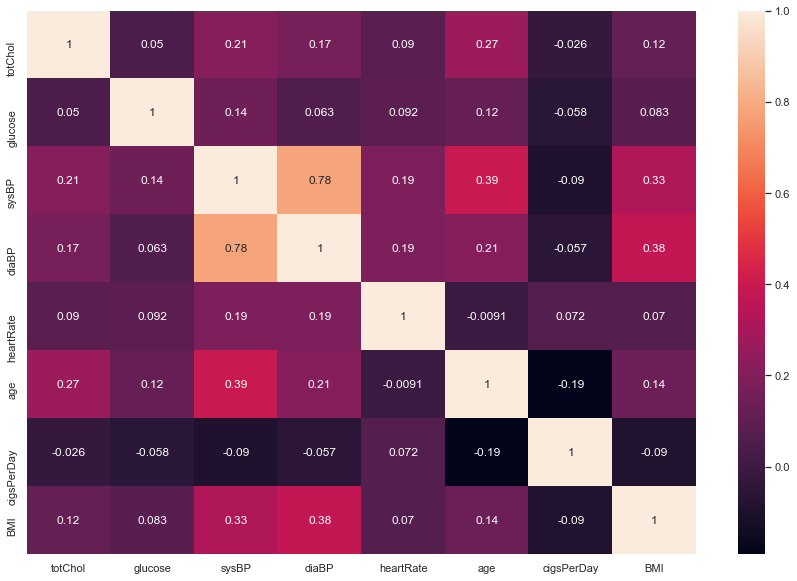

In [468]:
plt.figure(figsize=(15, 10))
corr = df_numeric.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [469]:
#Identifying catergorical fields
df_categorical

,education,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,College,1,0,0.0,0,0,0,0
1,High School,0,0,0.0,0,0,0,0
2,Some High School,1,1,0.0,0,0,0,0
3,Some College,0,1,0.0,0,1,0,1
4,Some College,0,1,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
4128,Some High School,1,1,0.0,0,1,0,1
4129,Some College,1,1,0.0,0,0,0,0
4130,High School,0,1,NaN,0,0,0,0
4131,Some High School,0,1,0.0,0,0,0,0


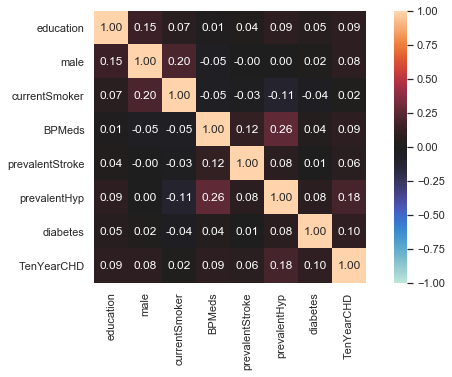

{'corr':                  education      male  currentSmoker    BPMeds  \
 education         1.000000  0.145224       0.066795  0.013395   
 male              0.145224  1.000000       0.199750 -0.051361   
 currentSmoker     0.066795  0.199750       1.000000 -0.048429   
 BPMeds            0.013395 -0.051361      -0.048429  1.000000   
 prevalentStroke   0.035773 -0.004304      -0.033515  0.116022   
 prevalentHyp      0.093119  0.003700      -0.105899  0.258396   
 diabetes          0.049508  0.017658      -0.041171  0.044458   
 TenYearCHD        0.087854  0.084014       0.016537  0.090417   
 
                  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  
 education               0.035773      0.093119  0.049508    0.087854  
 male                   -0.004304      0.003700  0.017658    0.084014  
 currentSmoker          -0.033515     -0.105899 -0.041171    0.016537  
 BPMeds                  0.116022      0.258396  0.044458    0.090417  
 prevalentStroke         1.000000   

In [470]:
#Performing correlation on catergorical fields
associations(df_categorical)
#We observe that none of the fields are correlated > 90% hence not dropping any fields

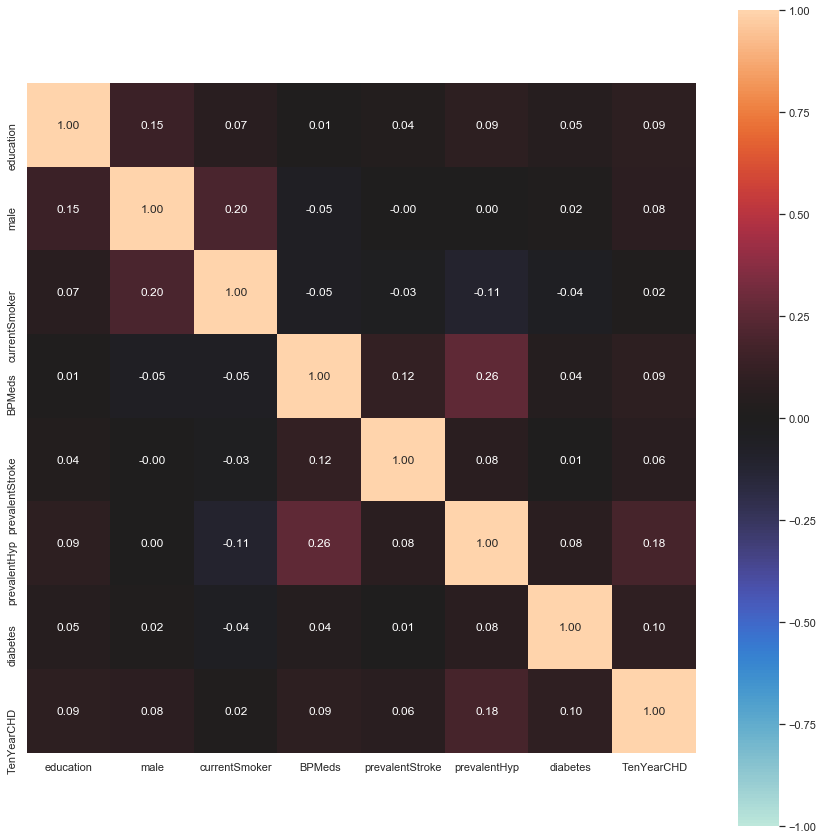

{'corr':                  education      male  currentSmoker    BPMeds  \
 education         1.000000  0.145224       0.066795  0.013395   
 male              0.145224  1.000000       0.199750 -0.051361   
 currentSmoker     0.066795  0.199750       1.000000 -0.048429   
 BPMeds            0.013395 -0.051361      -0.048429  1.000000   
 prevalentStroke   0.035773 -0.004304      -0.033515  0.116022   
 prevalentHyp      0.093119  0.003700      -0.105899  0.258396   
 diabetes          0.049508  0.017658      -0.041171  0.044458   
 TenYearCHD        0.087854  0.084014       0.016537  0.090417   
 
                  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  
 education               0.035773      0.093119  0.049508    0.087854  
 male                   -0.004304      0.003700  0.017658    0.084014  
 currentSmoker          -0.033515     -0.105899 -0.041171    0.016537  
 BPMeds                  0.116022      0.258396  0.044458    0.090417  
 prevalentStroke         1.000000   

In [471]:
#Alternative visual
associations(df_categorical, theil_u=True, figsize=(15, 15))

###### Neither of the attributes are highly correlated hence no requirement to drop any attributes

In [542]:
#Binning the data for all numeric columns
def createBin(data, numericCols, binNumber=4):
    d1 = data.copy()
    for i in numericCols[1:len(numericCols)]:
        bins = np.linspace(d1[i].min(), d1[i].max(), binNumber)
        d1[i + "Bin"] = pd.cut(d1[i], bins, precision=1, include_lowest=True, right=True)
#d1['PctWhiteBin'] = d1.PctWhiteBin.astype('category')

# d1['PctWhiteBin'] = pd.cut(d1.PctWhite / 100, bins, include_lowest=True, right=True)
    return d1
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))

df_bin=createBin(df, numericCols, binNumber=4)
#do binning for all numeric columns not categorical (covert to pct). 
df_bin

,totChol,glucose,sysBP,diaBP,heartRate,age,cigsPerDay,BMI,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,glucoseBin,sysBPBin,diaBPBin,heartRateBin,ageBin,cigsPerDayBin,BMIBin
0,195.0,77.000000,106.0,70.0,80.0,39.0,0.0,26.97,1,College,0,0.0,0,0,0,0,"(39.9, 158.0]","(83.4, 154.0]","(47.9, 79.5]","(77.0, 110.0]","(31.9, 44.7]","(-0.1, 23.3]","(15.4, 29.3]"
1,250.0,76.000000,121.0,81.0,95.0,46.0,0.0,28.73,0,High School,0,0.0,0,0,0,0,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(77.0, 110.0]","(44.7, 57.3]","(-0.1, 23.3]","(15.4, 29.3]"
2,245.0,70.000000,127.5,80.0,75.0,48.0,20.0,25.34,1,Some High School,1,0.0,0,0,0,0,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(43.9, 77.0]","(44.7, 57.3]","(-0.1, 23.3]","(15.4, 29.3]"
3,225.0,103.000000,150.0,95.0,65.0,61.0,30.0,28.58,0,Some College,1,0.0,0,1,0,1,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(43.9, 77.0]","(57.3, 70.0]","(23.3, 46.7]","(15.4, 29.3]"
4,285.0,85.000000,130.0,84.0,85.0,46.0,23.0,23.10,0,Some College,1,0.0,0,0,0,0,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(77.0, 110.0]","(44.7, 57.3]","(-0.1, 23.3]","(15.4, 29.3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,313.0,86.000000,179.0,92.0,66.0,50.0,1.0,25.97,1,Some High School,1,0.0,0,1,0,1,"(39.9, 158.0]","(154.0, 224.5]","(79.5, 111.0]","(43.9, 77.0]","(44.7, 57.3]","(-0.1, 23.3]","(15.4, 29.3]"
4129,207.0,68.000000,126.5,80.0,65.0,51.0,43.0,19.71,1,Some College,1,0.0,0,0,0,0,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(43.9, 77.0]","(44.7, 57.3]","(23.3, 46.7]","(15.4, 29.3]"
4130,248.0,86.000000,131.0,72.0,84.0,48.0,20.0,22.00,0,High School,1,0.0,0,0,0,0,"(39.9, 158.0]","(83.4, 154.0]","(47.9, 79.5]","(77.0, 110.0]","(44.7, 57.3]","(-0.1, 23.3]","(15.4, 29.3]"
4131,210.0,77.608826,126.5,87.0,86.0,44.0,15.0,19.16,0,Some High School,1,0.0,0,0,0,0,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(77.0, 110.0]","(31.9, 44.7]","(-0.1, 23.3]","(15.4, 29.3]"


In [543]:
#Getting percentage distribution of all categorical fields
def createCategoryPct(data, categoricalCols):
    d1 = data.copy()
    length = len(d1)
    for i in categoricalCols[1:len(categoricalCols)]:
        d1[i + 'Pct'] = (d1[i].groupby(d1[i]).transform('count'))*100/length
#d1[i + 'Pct'] = round(d1[i + 'Pct'],2)
#bins = np.linspace(d1[i].min(), d1[i].max(), binNumber)
#d1[i + "Bin"] = pd.cut(d1[i], bins, include_lowest=True, right=True)
    return d1
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))
df_pct=createCategoryPct(df, categoricalCols)

#df_pct.drop(['education','male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD'],inplace=True,axis = 1)
cols = df_pct.columns.difference(df_bin.columns)
df_bin_pct=pd.concat([df_bin, df_pct[cols]], axis=1)
#df=pd.concat([df_bin, df_pct], axis=1)
#use max col width to get bin columns

In [544]:
#Displaying combined attributes including binning and percentage. Drop the target variale converted to percentage
pd.set_option("display.max_columns", 100)
df_bin_pct.drop(['TenYearCHDPct'],inplace=True,axis = 1)
df_bin_pct

,totChol,glucose,sysBP,diaBP,heartRate,age,cigsPerDay,BMI,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,glucoseBin,sysBPBin,diaBPBin,heartRateBin,ageBin,cigsPerDayBin,BMIBin,BPMedsPct,currentSmokerPct,diabetesPct,malePct,prevalentHypPct,prevalentStrokePct
0,195.0,77.000000,106.0,70.0,80.0,39.0,0.0,26.97,1,College,0,0.0,0,0,0,0,"(39.9, 158.0]","(83.4, 154.0]","(47.9, 79.5]","(77.0, 110.0]","(31.9, 44.7]","(-0.1, 23.3]","(15.4, 29.3]",97.072345,50.520203,97.435277,42.729252,68.884587,99.395113
1,250.0,76.000000,121.0,81.0,95.0,46.0,0.0,28.73,0,High School,0,0.0,0,0,0,0,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(77.0, 110.0]","(44.7, 57.3]","(-0.1, 23.3]","(15.4, 29.3]",97.072345,50.520203,97.435277,57.270748,68.884587,99.395113
2,245.0,70.000000,127.5,80.0,75.0,48.0,20.0,25.34,1,Some High School,1,0.0,0,0,0,0,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(43.9, 77.0]","(44.7, 57.3]","(-0.1, 23.3]","(15.4, 29.3]",97.072345,49.479797,97.435277,42.729252,68.884587,99.395113
3,225.0,103.000000,150.0,95.0,65.0,61.0,30.0,28.58,0,Some College,1,0.0,0,1,0,1,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(43.9, 77.0]","(57.3, 70.0]","(23.3, 46.7]","(15.4, 29.3]",97.072345,49.479797,97.435277,57.270748,31.115413,99.395113
4,285.0,85.000000,130.0,84.0,85.0,46.0,23.0,23.10,0,Some College,1,0.0,0,0,0,0,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(77.0, 110.0]","(44.7, 57.3]","(-0.1, 23.3]","(15.4, 29.3]",97.072345,49.479797,97.435277,57.270748,68.884587,99.395113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,313.0,86.000000,179.0,92.0,66.0,50.0,1.0,25.97,1,Some High School,1,0.0,0,1,0,1,"(39.9, 158.0]","(154.0, 224.5]","(79.5, 111.0]","(43.9, 77.0]","(44.7, 57.3]","(-0.1, 23.3]","(15.4, 29.3]",97.072345,49.479797,97.435277,42.729252,31.115413,99.395113
4129,207.0,68.000000,126.5,80.0,65.0,51.0,43.0,19.71,1,Some College,1,0.0,0,0,0,0,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(43.9, 77.0]","(44.7, 57.3]","(23.3, 46.7]","(15.4, 29.3]",97.072345,49.479797,97.435277,42.729252,68.884587,99.395113
4130,248.0,86.000000,131.0,72.0,84.0,48.0,20.0,22.00,0,High School,1,0.0,0,0,0,0,"(39.9, 158.0]","(83.4, 154.0]","(47.9, 79.5]","(77.0, 110.0]","(44.7, 57.3]","(-0.1, 23.3]","(15.4, 29.3]",97.072345,49.479797,97.435277,57.270748,68.884587,99.395113
4131,210.0,77.608826,126.5,87.0,86.0,44.0,15.0,19.16,0,Some High School,1,0.0,0,0,0,0,"(39.9, 158.0]","(83.4, 154.0]","(79.5, 111.0]","(77.0, 110.0]","(31.9, 44.7]","(-0.1, 23.3]","(15.4, 29.3]",97.072345,49.479797,97.435277,57.270748,68.884587,99.395113


#### PCA

       PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0  0.109419 -0.073343 -0.870108  0.611866 -0.176550  0.025561  0.000116   
1 -0.509243 -0.502221 -0.190355  0.282677 -0.043909  0.003828  0.018529   
2  0.785693  0.057042 -0.152992 -0.448037 -0.009482 -0.003496 -0.035564   
3 -0.031885  0.383424  0.922844  0.012375  0.203769 -0.135416  0.041979   
4  0.271456 -0.506681  0.485012 -0.097150  0.008426  0.003279  0.005714   
5 -0.797407  0.360622  0.254566  0.463623 -0.276191 -0.042678  0.070388   
6 -0.615219 -0.366242 -0.176149 -0.430943  0.282368 -0.067010 -0.035916   
7  0.308567 -0.589691  0.443572  0.228406  0.041242 -0.013896  0.003754   
8 -0.304571  0.935037 -0.371628 -0.240126 -0.167916 -0.094147  0.020469   
9  0.541417  0.897026  0.322402 -0.261635 -0.315795 -0.038014  0.049934   

       PCA7      PCA8      PCA9     PCA10     PCA11     PCA12     PCA13  \
0  0.008316 -0.103739 -0.053992 -0.067307 -0.065268 -0.005077  0.001075   
1  0.206118 -0.063927 -0

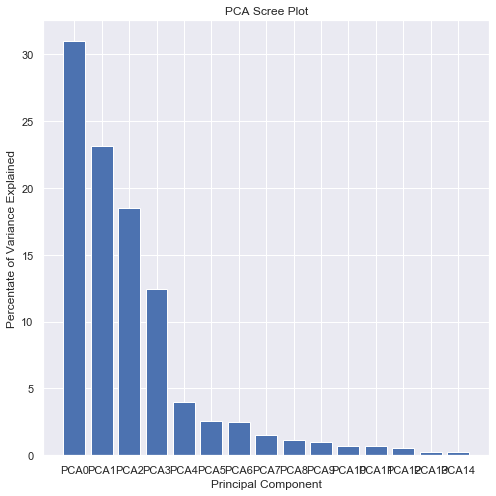

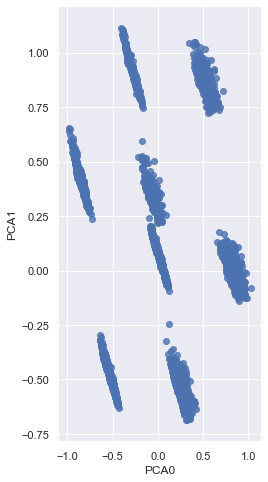

[0.30982725 0.23125466 0.18501449 0.12395552 0.03996485 0.02556926
 0.0247115  0.01504249 0.0111689  0.00968157 0.00706226 0.0065934
 0.00563534 0.00245451 0.002064  ]
[0.30982725 0.54108191 0.7260964  0.85005192 0.89001677 0.91558603
 0.94029753 0.95534002 0.96650892 0.97619049 0.98325275 0.98984615
 0.99548149 0.997936   1.        ]


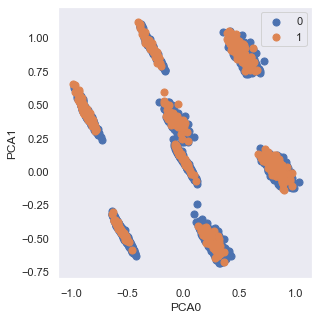

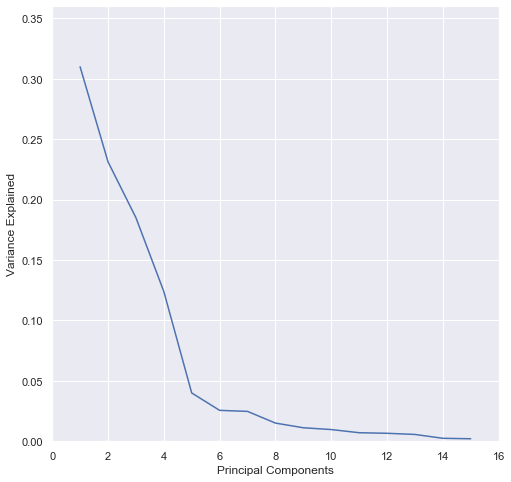

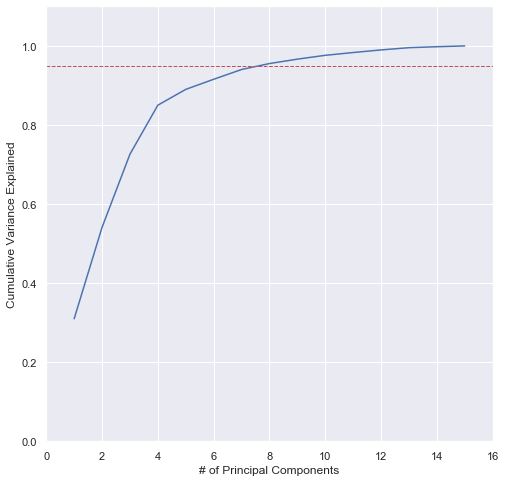

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,TenYearCHD
0,0.109419,-0.073343,-0.870108,0.611866,-0.176550,0.025561,0.000116,0.008316,-0.103739,-0.053992,-0.067307,-0.065268,-0.005077,0.001075,-0.014795,0
1,-0.509243,-0.502221,-0.190355,0.282677,-0.043909,0.003828,0.018529,0.206118,-0.063927,-0.015269,-0.081823,-0.022434,0.004387,-0.023290,0.005277,0
2,0.785693,0.057042,-0.152992,-0.448037,-0.009482,-0.003496,-0.035564,0.029636,0.018221,-0.008497,-0.000242,0.033720,0.000685,-0.013340,-0.023985,0
3,-0.031885,0.383424,0.922844,0.012375,0.203769,-0.135416,0.041979,-0.088722,0.084449,0.218304,0.010139,-0.092824,-0.019278,0.035619,0.074849,1
4,0.271456,-0.506681,0.485012,-0.097150,0.008426,0.003279,0.005714,0.133070,0.001429,0.075385,0.020515,0.095742,0.015847,0.009305,0.016955,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,0.428001,0.906550,0.257325,-0.284984,-0.096413,-0.080905,0.017036,-0.116384,0.133054,-0.229171,-0.022779,0.188427,0.006195,0.075709,-0.094322,1
4129,0.884742,0.027063,-0.134486,-0.135859,0.112439,-0.033347,-0.044517,-0.027804,-0.026770,0.309400,0.164901,-0.008502,-0.005700,-0.017984,-0.007302,0
4130,0.291852,-0.557840,0.455489,0.218978,0.108672,-0.015117,0.010956,0.051779,-0.074796,0.035538,0.019038,0.023437,0.005388,0.046097,-0.041031,0
4131,0.229484,-0.489021,0.484267,-0.410282,-0.112748,0.009573,-0.003531,0.081314,-0.018453,-0.055855,0.158241,0.024842,-0.000834,-0.025439,0.034602,0


In [546]:
response='TenYearCHD'

def scaleData(data):
            scaler = MinMaxScaler(feature_range=(0, 1))
            d2 = scaler.fit_transform(data)
            scaledData = pd.DataFrame(d2, columns=data.columns)
            return scaledData
        
def performPCA(data):
            pca = PCA()  # n_components=10
            # pca = SparsePCA()
            pcaModel = pca.fit(data)
            pcaTransformed = pd.DataFrame(pcaModel.transform(data), columns=range(data.shape[1]))
            for i in range(len(pcaTransformed.columns)):
                pcaTransformed.rename(columns={i: 'PCA' + str(i)}, inplace=True)
            print(pcaTransformed.head(10))
            comp = pd.DataFrame(pcaModel.components_, columns=data.columns)
            print(comp)
            return pca, pcaModel, pcaTransformed
        
        
def drawGraph(data, response, uniqueTarget):
            fig = plt.figure(figsize=(8, 8))
            plt.subplot(121)
            plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha=0.8)
            plt.xlabel('PCA0')
            plt.ylabel('PCA1')
            plt.show()

            plt.subplot(122)
            plt.xlabel('PCA0')
            plt.ylabel('PCA1')

            colors = np.random.rand(len(uniqueTarget))

            # for target, color in zip(uniqueTarget, colors):
            for target in (uniqueTarget):
                indicesToKeep = data[response] == target
                plt.scatter(data.loc[indicesToKeep, 'PCA0']
                            , data.loc[indicesToKeep, 'PCA1']
                            # , c=color
                            , s=50)
            plt.legend(uniqueTarget)
            plt.grid()

def drawScreePlot(pca, columns):
            percent_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
            # columns = ['PC1', 'PC2', 'PC3', 'PC4']
            plt.figure(figsize=(8, 8))
            plt.bar(x=range(1, len(columns) + 1), height=percent_variance, tick_label=columns)
            plt.ylabel('Percentate of Variance Explained')
            plt.xlabel('Principal Component')
            plt.title('PCA Scree Plot')
            plt.show()


def showVariance(pcaModel, pca):
            print(pcaModel.explained_variance_ratio_)
            print(np.cumsum(pcaModel.explained_variance_ratio_))
            plt.figure(figsize=(8, 8))
            plt.plot(list(range(1, len(pca.explained_variance_ratio_) + 1)), pca.explained_variance_ratio_)
            plt.axis([0, len(pca.explained_variance_ratio_) + 1, 0, max(pca.explained_variance_ratio_) + 0.05])
            # plt.xticks(list(range(1, len(pca.explained_variance_ratio_))))
            plt.xlabel('Principal Components')
            plt.ylabel('Variance Explained')
            plt.show()

            plt.figure(figsize=(8, 8))
            plt.plot(list(range(1, len(pca.explained_variance_ratio_) + 1)), np.cumsum(pca.explained_variance_ratio_))
            plt.axis([0, len(pca.explained_variance_ratio_) + 1, 0, 1.1])
            plt.axhline(y=0.95, color='r', linestyle='--', linewidth=1)
            # plt.xticks(list(range(1, 61)))
            plt.xlabel('# of Principal Components')
            plt.ylabel('Cumulative Variance Explained')
            plt.show()
            
def createPCA(data, response):
            targetDF = data[[response]]
            uniqueTarget = targetDF[response].unique()
            # d1 = data.drop(categoricalCols, axis=1)
            d1 = data.drop(response, axis=1)
            #d1 = pd.get_dummies(d1)
            # d1=data.copy()
            scaledData = scaleData(d1)

            pca, pcaModel, pcaTransformed = performPCA(scaledData)
            drawScreePlot(pca, pcaTransformed.columns)
            pcaTransformedResponse = pd.concat([pcaTransformed, targetDF], axis=1)
            pcaTransformedResponse

            drawGraph(pcaTransformedResponse, response, uniqueTarget)
            showVariance(pcaModel, pca)
            return pcaTransformedResponse

createPCA(df_encoded, response)

#We see from the graph below , after 5 components, the variance drops quickly. 
#From the cumulative variance graph , 7 components is the cut off
#PCA0 = TotChol ? 
#from pcaTransformedResponse take only the first 7 PCA components for modeling iterations

# DATA VISUALIZATION

1. Missing value (completed above)
2. Outlier (completed above)
3. PCA
4. Correlation (completed above)

Yet to do 
5. Regression Diagnostics
6. AUC


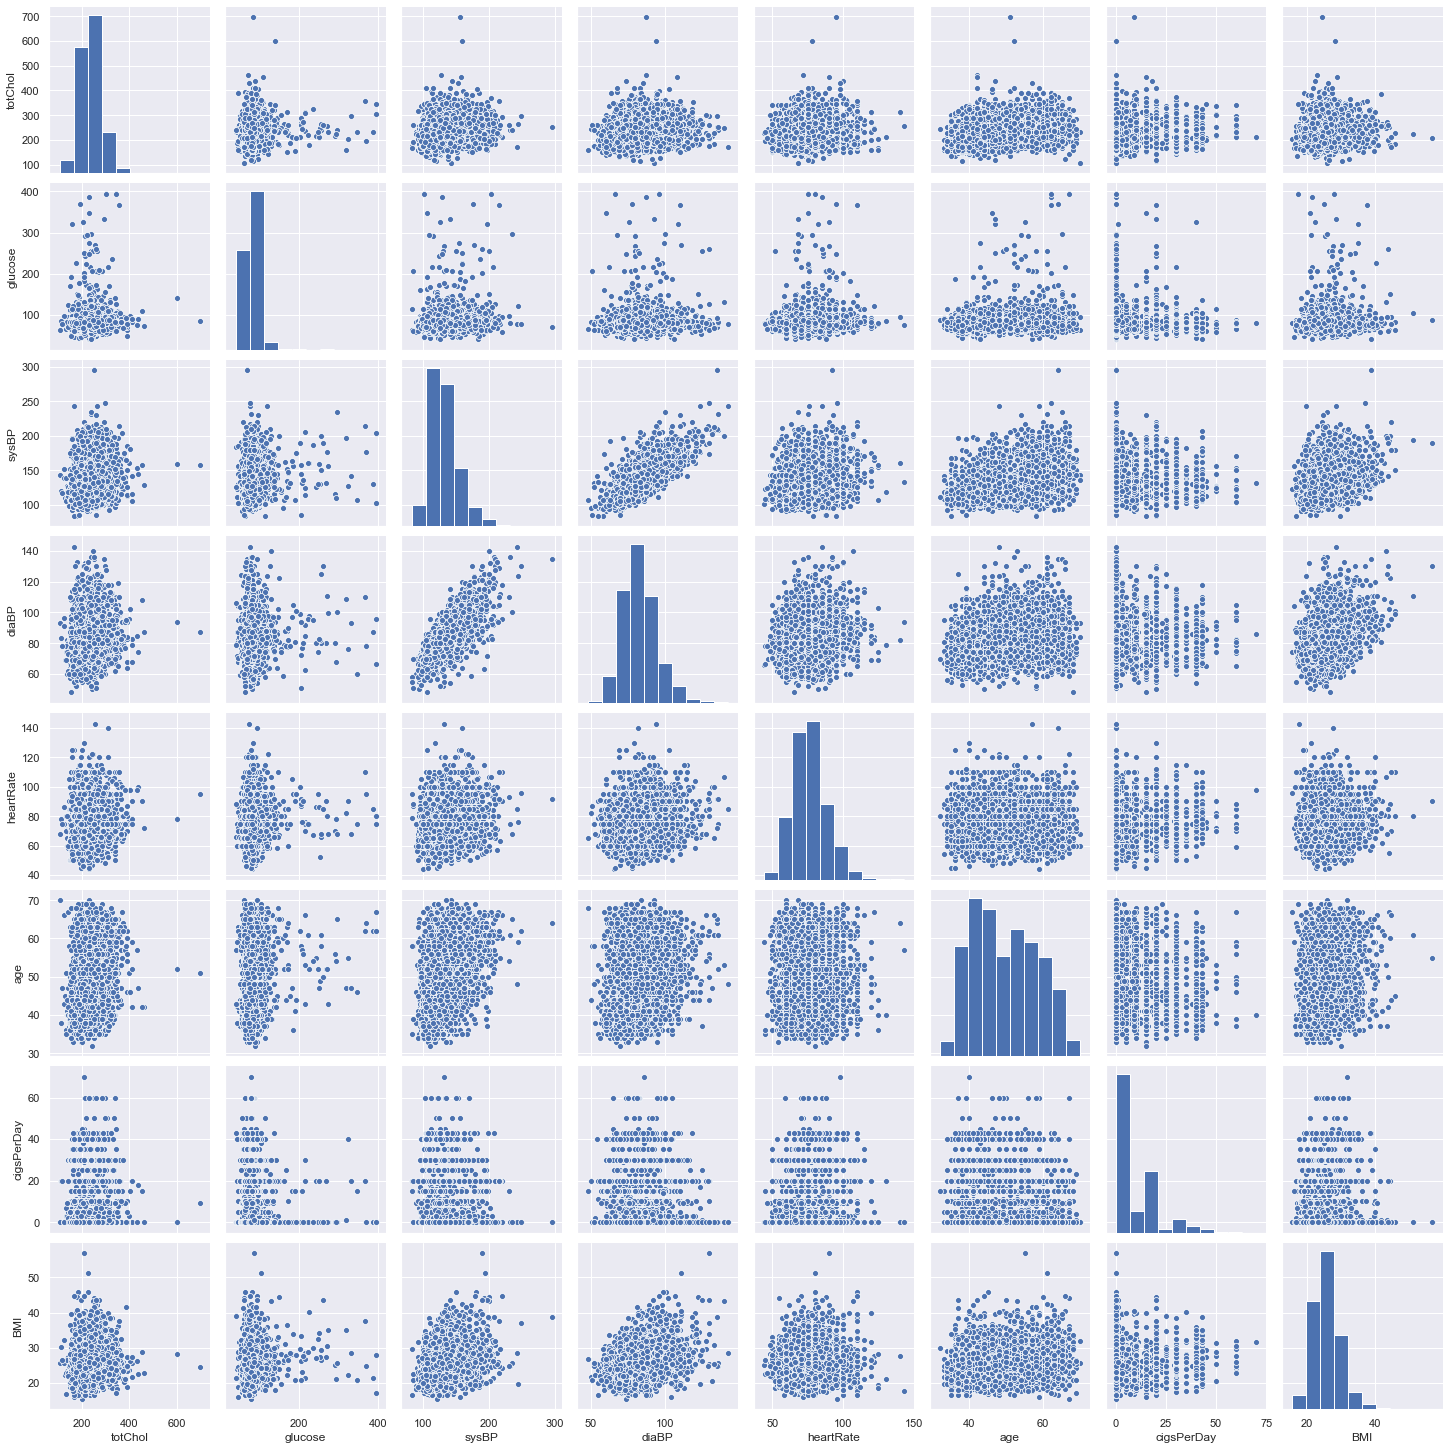

In [323]:
#sns.set_theme(style="ticks")
sns.pairplot(df_numeric)

#From below we see the highest correlation between diaBP and sysBP

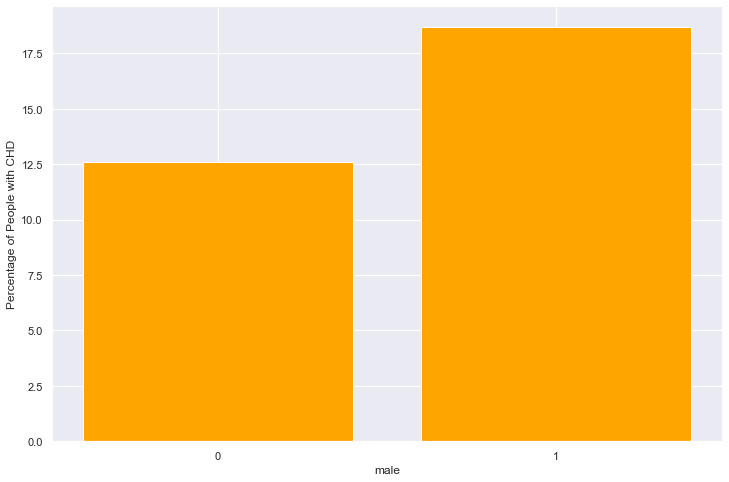

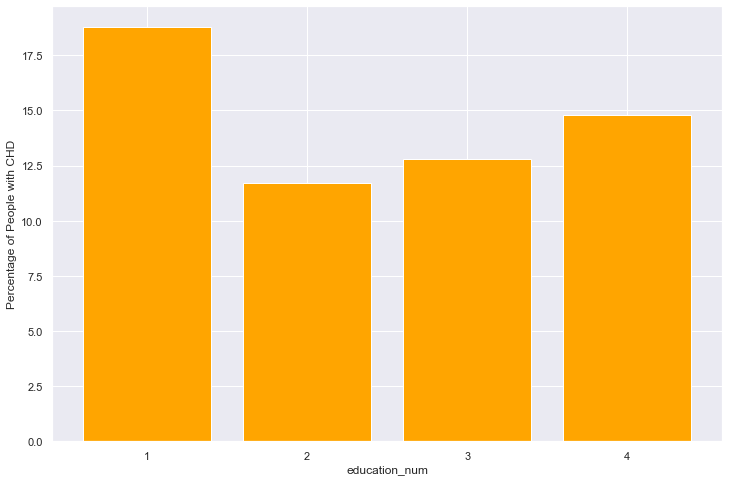

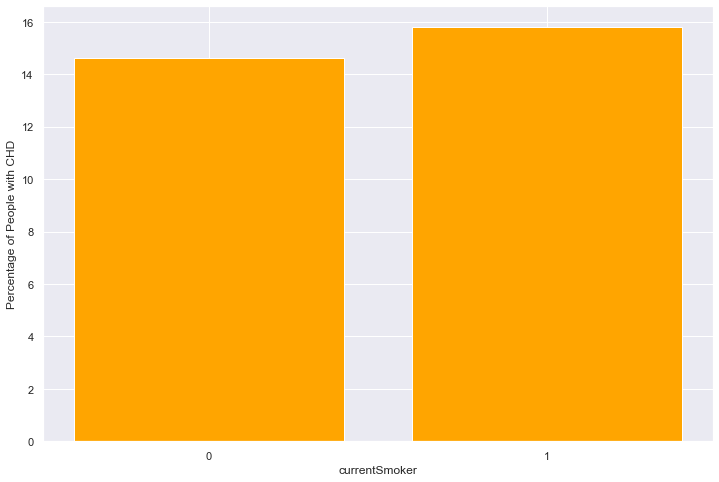

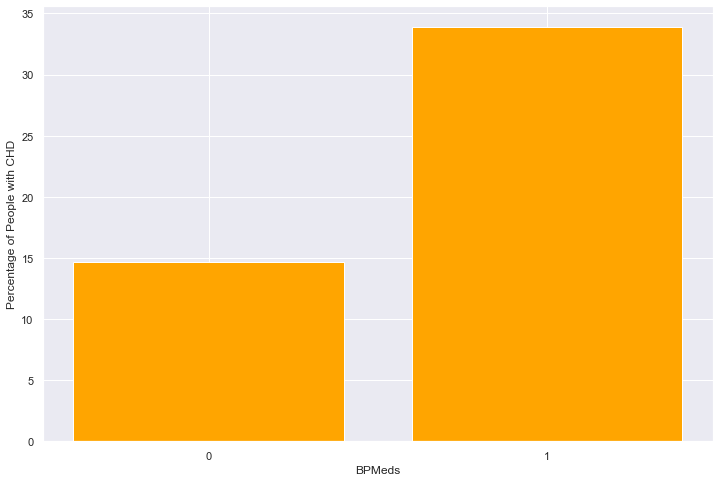

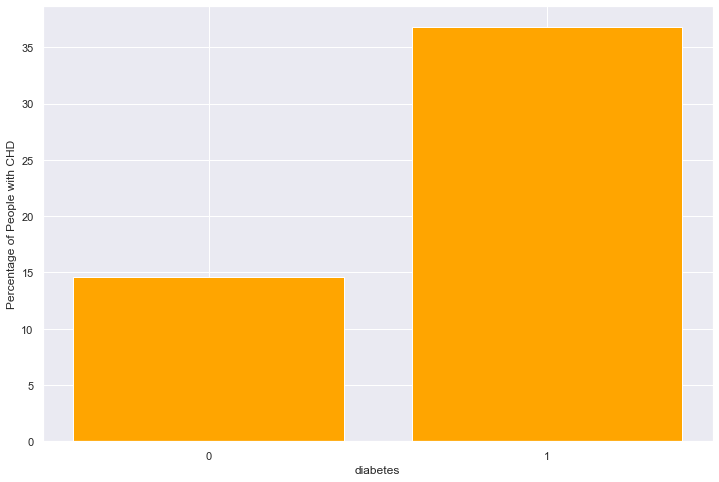

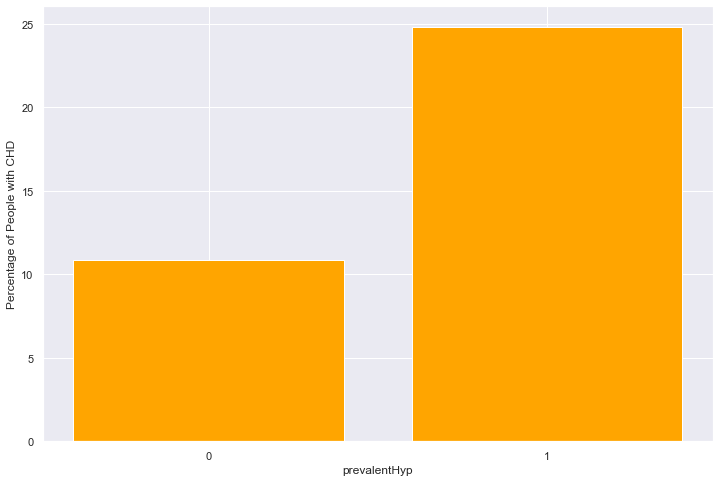

In [548]:
def percentageDistribution(data, percentCol, target):
            # cat col vs target
            fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8),facecolor='white')
            distribution = data[percentCol].value_counts()
            percentColValue = [int(x) for x in sorted(distribution.index)] 
            targetCount = dict(map(lambda x: [x,0],percentColValue))
            
            for t,c in zip(data[target],data[percentCol]):
                targetCount[c] += t
                rates = [(targetCount[c] / float(distribution.loc[c]))*100 for c in percentColValue]
            
            x = np.arange(len(percentColValue))
            
            
            ax.bar(x,rates,color = 'Orange')
            ax.set_xticks(x)
            ax.set_xticklabels(percentColValue)
            ax.set_xlabel(percentCol)
            ax.set_ylabel('Percentage of People with CHD')
            
            plt.show()

# Create the dictionary 
event_dictionary ={'Some High School' : 1, 'High School' : 2, 'Some College' : 3, 'College' :4} 
# Add a new column named 'Price' 
df['education_num'] = df['education'].map(event_dictionary) 

percentageDistribution(df, percentCol='male', target='TenYearCHD')
percentageDistribution(df, percentCol='education_num', target='TenYearCHD')
percentageDistribution(df, percentCol='currentSmoker', target='TenYearCHD')
percentageDistribution(df, percentCol='BPMeds', target='TenYearCHD')
percentageDistribution(df, percentCol='diabetes', target='TenYearCHD')
percentageDistribution(df, percentCol='prevalentHyp', target='TenYearCHD')
#'currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'

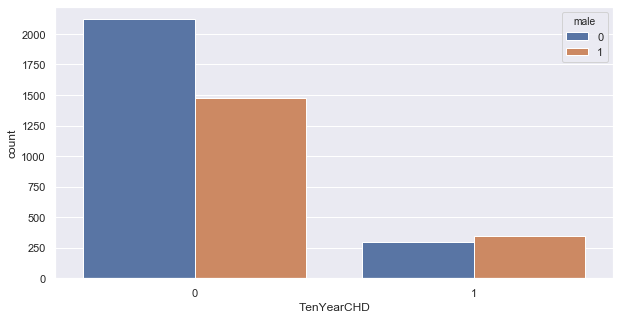

In [34]:
ax = sns.countplot(x="TenYearCHD", hue="male", data=df)
#convert to %
0    2419
1    1819

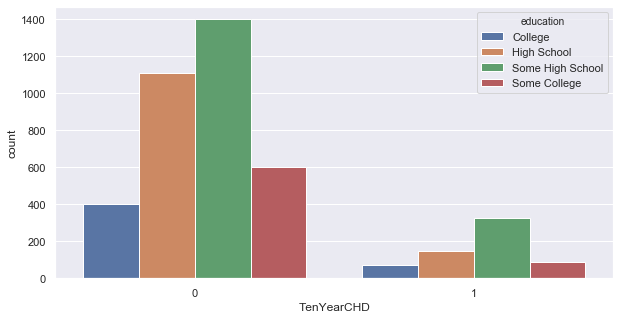

In [107]:
ax = sns.countplot(x="TenYearCHD", hue="education", data=df)
#convert to %
Some High School    1720
High School         1253
Some College         687
College              473
NaN                  105

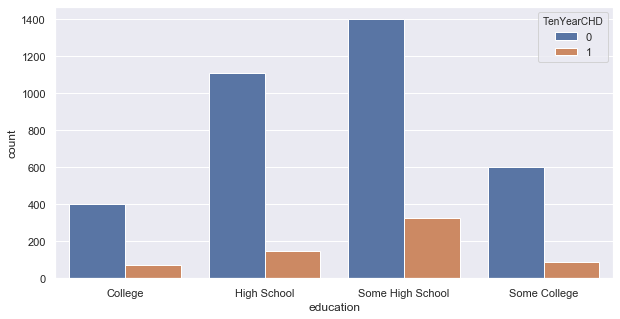

In [570]:
sns.countplot(x='education',data=df,hue='TenYearCHD')

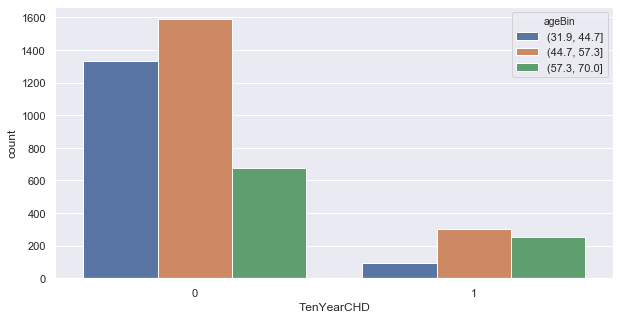

In [39]:
ax = sns.countplot(x="TenYearCHD", hue="ageBin", data=df_bin)

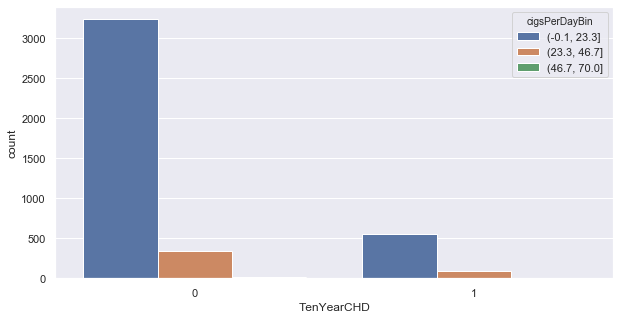

In [109]:
ax = sns.countplot(x="TenYearCHD", hue="cigsPerDayBin", data=df_bin)

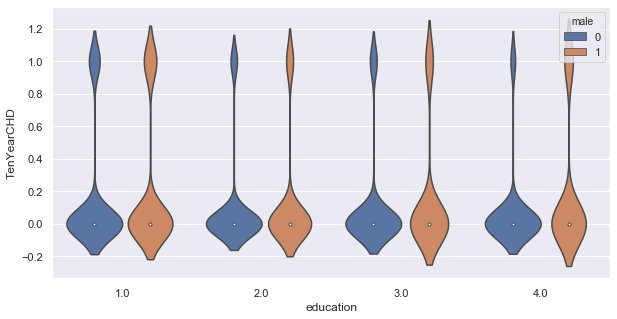

In [42]:
ax=sns.violinplot(x="education" , y="TenYearCHD" , hue="male" , data=df)

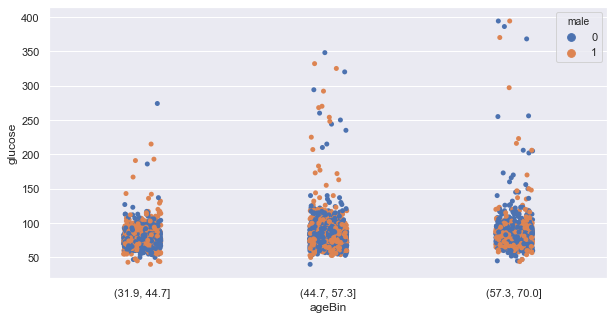

In [48]:
ax=sns.stripplot(x="ageBin" , y="glucose" , hue="male" , data=df_bin)

[Text(0, 0.5, '')]

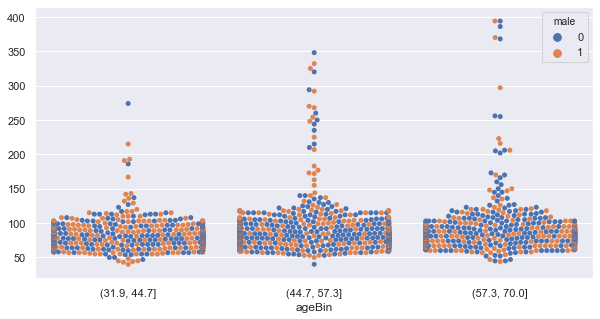

In [49]:
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(x="ageBin" , y="glucose" , hue="male" , data=df_bin)
ax.set(ylabel="")

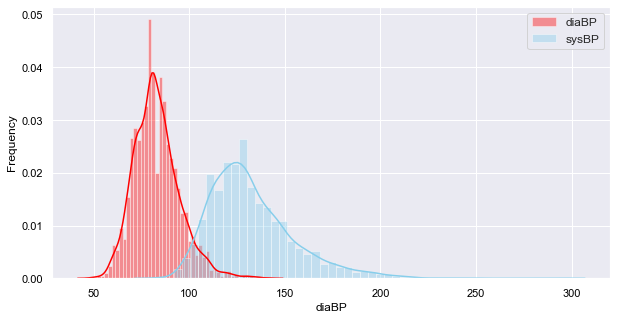

In [571]:
sns.distplot(df['diaBP'], color = 'Red', label = 'diaBP')
sns.distplot(df['sysBP'], color = 'skyblue', label = 'sysBP')
plt.legend(fontsize = 12)
plt.xlabel('diaBP', color = 'black')
plt.ylabel('Frequency', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('histogram.png')

plt.show()

# MODELLING

In [ ]:
Preparation
Scale the dataset
Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance data

Principal Component Analysis
Perform PCA
Draw screen plot to find how many components should be selected for
Find contribution of columns on each dimension
Find Correlation between columns and dimensions
Find contribution of rows on each dimension
Find Correlation between rows and dimensions
Perform Clustering
Apply Models
Take first n dimension that contributes 90% variance
Apply following model
GLM
Decision Tree
Random Forest
SVM
Gradient Boosting Classifier
Artificial Neural Networks 



In [318]:
#Ways to split columns for test train

#Iteration 1: All data with out feature engineering
#Iteration 2: All data with all feature engineering
#Iteration 3: Mice imputed Vs. mean imputed
#Iteration 4: All data + FE + Outlier removed
#Iteration 5: All data + FE + Binning
#Iteration 6: All data + FE + Binning + PCT treatment
#Iteration 7: All data + FE + SMOTE
#Iteration 8: All data + FE + Outlier removed + Binning +PCT treatment + SMOTE
#Iteration 9 : with PCA

X = df.iloc[:, :-1].values # copy all columns excluding last column
Y = df.iloc[:, -1].values   # copy the last column only
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

In [319]:

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(
    penalty='l2',
    solver='newton-cg',
    random_state=42
)
logisticRegr.fit(X_train, y_train)
logisticRegr_predict = logisticRegr.predict(X_test)
logisticRegr_predict_proba = logisticRegr.predict_proba(X_test)[:,1]
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print('Accuracy:',format(accuracy_score(y_test, logisticRegr_predict)*100))
print('AUC:',format(roc_auc_score(y_test, logisticRegr_predict_proba)*100))
print('Classification_report:',classification_report(y_test, logisticRegr_predict))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, logisticRegr_predict)
cm

Accuracy: 85.35031847133759
AUC: 73.54680847721238
Classification_report:               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1201
           1       0.61      0.07      0.12       212

    accuracy                           0.85      1413
   macro avg       0.73      0.53      0.52      1413
weighted avg       0.82      0.85      0.80      1413



array([[1192,    9],
       [ 198,   14]])

# EVALUATION

In [ ]:
Predict
Transform test data into PCA
Run the model against test data

Calculate the Accuracy
Generate confusion matrix
Draw AUC for each model
Display accuracy of each model in a tabular form


# IGNORE FOLLOWING.. WORK IN PROGRESS

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.3,random_state=42)

#!pip install h2o
import h2o
h2o.init()
train_h = h2o.H2OFrame(train)
test_h = h2o.H2OFrame(test)
response = 'TenYearCHD'

train_h[response] = train_h[response].asfactor()
test_h[response] = test_h[response].asfactor()

features = train_h.columns
features.pop(0)

In [ ]:
from h2o.automl import H2OAutoML

automl = H2OAutoML(project_name="GLM",
                  max_models = 15,
                  nfolds =3,
                  stopping_metric="AUC",
                  sort_metric="AUC",
                  exclude_algos=["StackedEnsemble","DeepLearning","DRF","XGBoost","GBM"],
                  seed = 1234,
                  balance_classes=True)


automl.train(training_frame=train_h,y=response,x=features)
lb = automl.leaderboard
lb

In [ ]:
model_id = [i for i in lb.as_data_frame()["model_id"]][0]
model = h2o.get_model(model_id)
model.varimp_plot()

In [ ]:
model.model_performance(test_h)

In [316]:


#from collections import Counter
counter=Counter(y_train)
print('before',counter)
smt=SMOTE()
X_train_sm, y_train_sm =smt.fit_resample(X_train,y_train)
counter=Counter(y_train_sm)
print('after',counter)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())
clf.best_params_
lr1 = LogisticRegression(C=4,penalty='l1', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()


ModuleNotFoundError: No module named 'imblearn'

In [95]:
#Converting all datatypes to integer for further processing
#df[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose','heartRate']] = df[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose','heartRate']].astype(int)
#df[['heartRate']] = df[['heartRate']].astype(int)
#df.iloc[:,0:8] = df.iloc[:,0:8].astype(int)

In [287]:
def imputeByMean(data, nonNumeric):
    imputedMean = SimpleImputer(strategy='mean') # for median imputation replace 'mean' with 'median'
    dataNumeric = data.drop(nonNumeric, axis=1)
    imputedMean.fit(dataNumeric)
    imputedData = imputedMean.transform(dataNumeric)

    d1 = pd.DataFrame(imputedData)
    d1.columns = dataNumeric.columns
    finalImputedData = pd.concat([d1, data.loc[:,nonNumeric]], axis=1)
## imputedData.columns = data.columns
    return finalImputedData
cols = df.columns
num_cols = df._get_numeric_data().columns
nonNumeric=list(set(cols) - set(num_cols))

imputeByMean(df,nonNumeric)

#Use Mice 
#For categorical - delete rows and apply mice on numerical 
#pip install impute 


#Performing mean imputation on the fields that have nulls
#df["education"].replace(np.nan, df["education"].astype("float32").mean(axis = 0), inplace = True)
#df["cigsPerDay"].replace(np.nan, df["cigsPerDay"].astype("float32").mean(axis = 0), inplace = True)
#df["BPMeds"].replace(np.nan, df["BPMeds"].astype("float32").mean(axis = 0), inplace = True)
#df["totChol"].replace(np.nan, df["totChol"].astype("float32").mean(axis = 0), inplace = True)
#df["BMI"].replace(np.nan, df["BMI"].astype("float32").mean(axis = 0), inplace = True)
#df["glucose"].replace(np.nan, df["glucose"].astype("float32").mean(axis = 0), inplace = True)
#df["heartRate"].replace(np.nan, df["heartRate"].astype("float32").mean(axis = 0), inplace = True)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0
4235,0.0,48.0,2.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966751,0.0


In [108]:
ax=sns.displot(x="ageBin" , y="glucose" , hue="male" , data=df_bin)

AttributeError: module 'seaborn' has no attribute 'displot'

In [ ]:
#!pip install plotnine
#!pip install statsmodel
#from plotnine.data import mpg
from plotnine import ggplot #, aes, facet_grid, labs, geom_point
ggplot(df) #+ aes(x="TenYearCHD") + geom_bar() + coord_flip()

In [ ]:
sns.displot(
    df, x="totChol", col="TenYearCHD", row="male",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [483]:
Questions: 
    
    #Question.. is there a better way to assign this rather than maunally? since all the fields are of type numeric
numericCols=['totChol','glucose','sysBP','diaBP','heartRate','age','cigsPerDay','BMI']
categoricalCols=['education','male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
df_numeric=df[numericCols]
df_categorical=df[categoricalCols]

#After mice, it imputes even for categorica as numeric is that ok? 
#can you teach a stacked ensemble and distributing weights to each model
# How to best save all results of iteration in a grid and compare
# Automate iterations
#why do you use self
#for binning and pct  not doing it on edu encoded

SyntaxError: invalid syntax (<ipython-input-483-6239eaab651c>, line 1)